In [1]:
include("../IndexMatrix.jl")
include("../BP.jl")
include("../AWGN.jl")
include("../Polar.jl")
struct BPProblem
    N::Int
    K::Int
    mi::Int
    M::Matrix{Int}
    L::Matrix{Float64}
    R::Matrix{Float64}
    polar::Polar
end

BPProblem(N,K,mi)  = begin 
    M = indexMatrix(N)
    n = Int(log2(N))
    L = zeros(N,n+1)
    R = zeros(N,n+1)
    polar = Polar(batt,N,K)
    BPProblem(N,K,mi,M,L,R,polar)
end

struct Prod; end
BPProblem(::Type{Prod},N,K,mi)  = begin 
    M = indexMatrix(N)
    n = Int(log2(N))
    L = zeros(N,n+1)
    R = zeros(N,n+1)
    F = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 105, 107, 109, 113, 115, 117, 121, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 169, 171, 173, 177, 179, 181, 185, 193, 194, 195, 197, 201, 203, 205, 209, 211, 213, 217, 225, 226, 227, 229, 233, 235, 237, 241, 243, 245, 249, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 293, 297, 299, 301, 305, 307, 309, 313, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 357, 361, 363, 365, 369, 371, 373, 377, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 421, 425, 427, 429, 433, 435, 437, 441, 449, 450, 451, 453, 457, 459, 461, 465, 467, 469, 473, 481, 482, 483, 485, 489, 491, 493, 497, 499, 501, 505, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 549, 553, 555, 557, 561, 563, 565, 569, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 613, 617, 619, 621, 625, 627, 629, 633, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 677, 681, 683, 685, 689, 691, 693, 697, 705, 706, 707, 709, 713, 715, 717, 721, 723, 725, 729, 737, 738, 739, 741, 745, 747, 749, 753, 755, 757, 761, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 805, 809, 811, 813, 817, 819, 821, 825, 833, 834, 835, 837, 841, 843, 845, 849, 851, 853, 857, 865, 866, 867, 869, 873, 875, 877, 881, 883, 885, 889, 897, 898, 899, 901, 905, 907, 909, 913, 915, 917, 921, 929, 930, 931, 933, 937, 939, 941, 945, 947, 949, 953, 961, 962, 963, 965, 969, 971, 973, 977, 979, 981, 985, 993, 994, 995, 997, 1001, 1003, 1005, 1009, 1011, 1013, 1017]
    A = infobits_select(F,N)
    polar = Polar(F,A)
    BPProblem(N,K,mi,M,L,R,polar)
end


function initialize!(L,R,F,ch::AWGN)
    updatellr!(ch)
    initializeLandR!(L,R,F,ch.llr)
    nothing
end

function iserror(t::BPProblem)
    A = getinfobits(t.polar)
    @views !isnothing(findfirst(<(0.0),t.L[A,1]))
end

struct INFOBITS; end
function errors(::Type{INFOBITS},t::BPProblem)
    A = getinfobits(t.polar)
    #sum(ifelse(t.L[i,1] < 0.0,1,0) for i in A) 
    @views sum(ifelse(t.L[i,end] + t.R[i,end] < 0.0,1,0) for i in A) 
end

struct ALLBITS; end
function errors(::Type{ALLBITS},t::BPProblem)
    @views sum(ifelse(t.L[i,end] + t.R[i,end] < 0.0,1,0) for i=1:t.N) 
end

calcber(::Type{INFOBITS},ber,sim,t::BPProblem) = ber/sim/t.K
calcber(::Type{ALLBITS},ber,sim,t::BPProblem) = ber/sim/t.N

function solver(sim,t::BPProblem,ch::AWGN; BERMODE = ALLBITS)
    n = Int(log2(t.N)); F = getfrozenbits(t.polar); A = getinfobits(t.polar)
    u = zeros(Int,t.N); v = zeros(Int,t.N)
    function checkcond()
        for i=1:t.N
            v[i] = harddecision(Int,t.L[i,end],t.R[i,end])
            u[i] = harddecision(Int,t.L[i,1],t.R[i,1])
        end 
        Gcheck(u,v)
    end

    bler = 0; ber = 0; errornum = Int[]
    
    for i=1:sim
        initialize!(t.L,t.R,F,ch)
        success = BP(t.N,t.mi,t.L,t.R,t.M,checkcond)
        tmp = errors(BERMODE,t)
        if iszero(tmp)
            continue
        end
        push!(errornum,tmp)
        bler += 1
        ber += tmp
    end
    return bler/sim,calcber(BERMODE,ber,sim,t), errornum
end

solver (generic function with 1 method)

In [ ]:
N = 16; K = 7
t = BPProblem(Prod,N,K,200)
awgn = AWGN(N,K,8,3.0)
println(awgn)
@time bler,ber,e= solver(10000,t,awgn;BERMODE = INFOBITS)

In [4]:
N = 1024; K = 441
t = BPProblem(Prod,N,K,200)
awgn = AWGN(N,K,8,3.0)
println(awgn)
@time bler,ber,e= solver(10000,t,awgn;BERMODE = INFOBITS)

AWGN(1024, 441, 3.0, -0.6586136717197344, 0.4306640625, MersenneTwister(8), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

(0.2181, 0.005268480725623583, [6, 3, 3, 11, 4, 12, 9, 8, 6, 10  …  8, 11, 15, 12, 14, 23, 6, 9, 6, 37])

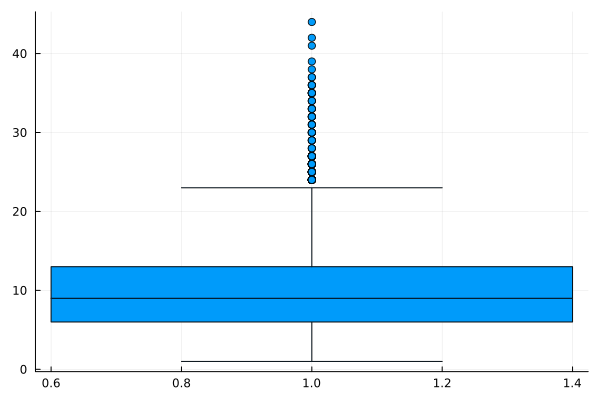

In [5]:
using StatsPlots
boxplot(e,label="")

In [25]:
N = 1024; K = 441
t = BPProblem(Prod,N,K,200)
awgn = AWGN(N,K,8,3.0)
println(awgn)
@time bler,ber,e= solver(10000,t,awgn)

AWGN(1024, 441, 3.0, -0.6586136717197344, 0.4306640625, MersenneTwister(8), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

(0.2185, 0.0047716796875, [16, 16, 16, 24, 12, 16, 16, 16, 16, 28  …  14, 22, 32, 16, 24, 48, 8, 16, 16, 74])

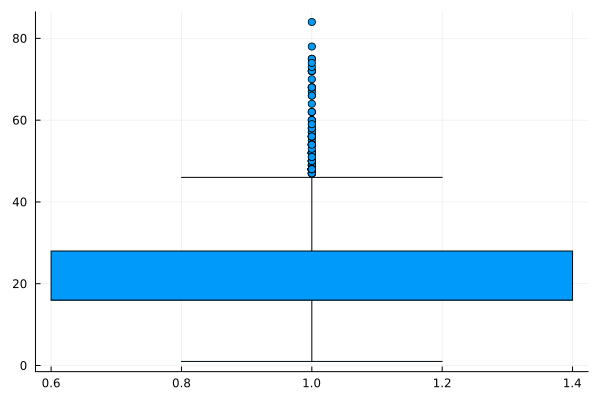

In [26]:
using StatsPlots
boxplot(e,label="")

In [19]:
N = 1024; K = 441
t = BPProblem(Prod,N,K,200)
awgn = AWGN(N,K,8,2.0)
println(awgn)
@time bler,ber,e= solver(1000,t,awgn)

AWGN(1024, 441, 2.0, -1.6586136717197344, 0.4306640625, MersenneTwister(8), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

(0.584, 0.019809523809523808, [17, 4, 12, 8, 6, 14, 8, 11, 9, 14  …  6, 36, 52, 2, 19, 16, 8, 6, 16, 4])

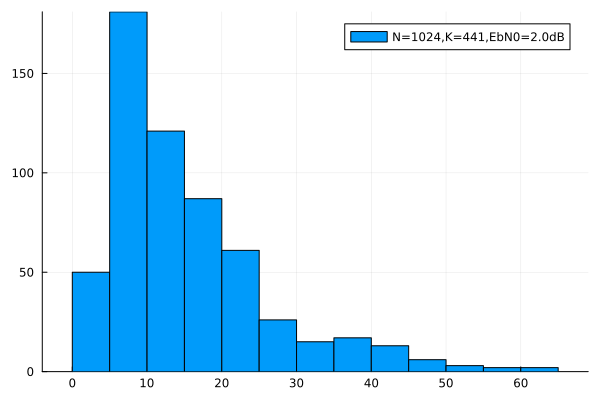

In [21]:
using Plots
e = [17, 4, 12, 8, 6, 14, 8, 11, 9, 14, 13, 3, 10, 19, 9, 4, 20, 12, 8, 18, 8, 14, 6, 35, 23, 20, 9, 23, 2, 8, 28, 9, 12, 6, 16, 24, 23, 18, 3, 9, 12, 18, 6, 15, 10, 21, 13, 4, 16, 10, 9, 8, 8, 15, 21, 1, 21, 9, 6, 12, 6, 12, 6, 17, 12, 6, 2, 14, 12, 13, 14, 48, 15, 8, 8, 5, 9, 35, 14, 26, 9, 40, 12, 17, 6, 14, 7, 21, 4, 17, 23, 9, 12, 20, 5, 49, 6, 20, 5, 25, 12, 4, 31, 6, 4, 5, 21, 20, 19, 9, 25, 10, 33, 4, 4, 15, 24, 16, 10, 12, 17, 34, 13, 4, 57, 18, 21, 6, 6, 9, 15, 4, 4, 36, 10, 16, 40, 6, 15, 36, 45, 6, 21, 8, 18, 7, 4, 6, 7, 9, 16, 14, 14, 5, 4, 6, 20, 19, 43, 12, 23, 32, 12, 4, 6, 4, 26, 6, 25, 13, 8, 63, 9, 16, 8, 9, 9, 7, 9, 3, 24, 12, 40, 13, 37, 9, 28, 32, 12, 14, 8, 23, 15, 9, 11, 30, 22, 7, 12, 15, 6, 17, 9, 8, 5, 9, 10, 29, 17, 9, 12, 18, 9, 12, 9, 12, 9, 15, 16, 41, 5, 30, 6, 22, 9, 8, 10, 6, 36, 17, 2, 3, 11, 6, 35, 13, 4, 14, 31, 12, 27, 8, 8, 12, 12, 15, 39, 8, 9, 21, 22, 17, 20, 21, 13, 4, 6, 14, 21, 11, 12, 38, 24, 10, 9, 17, 9, 6, 12, 31, 30, 9, 3, 17, 27, 6, 12, 25, 29, 25, 23, 15, 35, 7, 23, 6, 13, 5, 12, 15, 9, 10, 6, 8, 23, 11, 9, 41, 6, 18, 15, 8, 14, 7, 27, 27, 13, 6, 4, 21, 42, 15, 14, 8, 8, 3, 13, 3, 6, 5, 9, 22, 13, 13, 4, 7, 11, 8, 46, 4, 9, 29, 9, 9, 17, 8, 4, 22, 16, 10, 4, 20, 9, 21, 6, 37, 16, 6, 11, 19, 24, 12, 8, 43, 20, 16, 7, 6, 3, 8, 9, 7, 24, 18, 6, 7, 26, 15, 40, 14, 17, 13, 16, 6, 13, 20, 10, 5, 12, 16, 20, 18, 8, 45, 12, 14, 8, 16, 27, 9, 10, 4, 13, 12, 30, 11, 15, 26, 20, 8, 17, 41, 35, 9, 6, 22, 13, 13, 43, 17, 25, 12, 30, 4, 11, 4, 6, 11, 15, 6, 12, 13, 6, 36, 6, 42, 6, 16, 42, 61, 6, 14, 6, 4, 12, 7, 53, 6, 6, 23, 6, 19, 20, 12, 17, 17, 22, 6, 25, 9, 11, 10, 6, 24, 8, 19, 14, 7, 24, 13, 8, 6, 27, 6, 20, 24, 11, 24, 16, 12, 9, 17, 1, 10, 24, 8, 17, 6, 6, 9, 31, 21, 8, 32, 15, 9, 14, 14, 13, 9, 33, 12, 26, 9, 3, 12, 10, 16, 8, 15, 35, 9, 52, 16, 10, 4, 11, 6, 18, 17, 9, 37, 28, 18, 13, 13, 23, 15, 36, 6, 18, 8, 19, 6, 15, 46, 24, 6, 4, 4, 28, 11, 23, 58, 1, 10, 4, 18, 24, 8, 10, 8, 12, 16, 9, 17, 14, 17, 6, 6, 12, 6, 9, 2, 6, 9, 14, 12, 20, 6, 5, 9, 6, 24, 16, 3, 14, 9, 18, 6, 3, 11, 28, 16, 6, 36, 52, 2, 19, 16, 8, 6, 16, 4]
histogram(e,label="N=1024,K=441,EbN0=2.0dB")

In [14]:
N = 1024; K = 441
t = BPProblem(Prod,N,K,200)
awgn = AWGN(N,K,8,3.0)
@time bler = solver(10000,t,awgn)

 27.929013 seconds (10 allocations: 70.203 KiB)


(0.2181, 0.005268480725623583, [6, 3, 3, 11, 4, 12, 9, 8, 6, 10  …  8, 11, 15, 12, 14, 23, 6, 9, 6, 37])

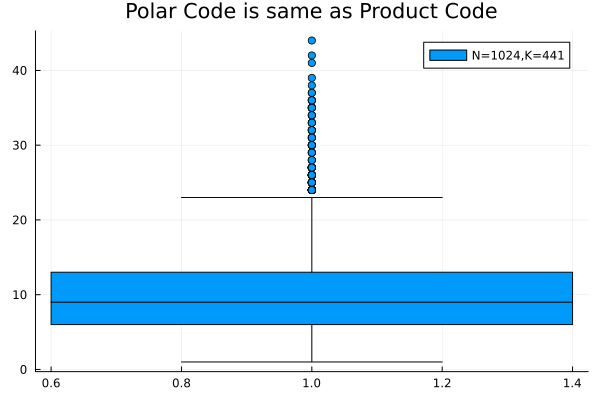

In [18]:
using StatsPlots
e = [6, 3, 3, 11, 4, 12, 9, 8, 6, 10, 6, 12, 12, 12, 19, 15, 6, 6, 2, 9, 12, 6, 10, 11, 4, 17, 27, 11, 9, 15, 21, 4, 8, 12, 6, 4, 6, 9, 16, 9, 18, 6, 4, 18, 35, 26, 19, 11, 12, 8, 6, 6, 14, 6, 8, 8, 34, 28, 5, 7, 13, 10, 10, 6, 4, 10, 6, 3, 9, 25, 4, 6, 15, 3, 5, 15, 6, 4, 4, 9, 6, 9, 6, 14, 9, 8, 3, 6, 6, 9, 25, 22, 12, 10, 9, 9, 15, 13, 6, 34, 6, 11, 8, 7, 9, 9, 6, 6, 12, 8, 14, 12, 9, 6, 14, 2, 6, 9, 17, 30, 9, 3, 9, 8, 6, 6, 9, 9, 16, 6, 9, 13, 6, 20, 1, 12, 9, 12, 16, 9, 8, 12, 5, 9, 22, 13, 6, 3, 4, 10, 4, 15, 10, 13, 16, 18, 17, 12, 12, 17, 8, 4, 12, 14, 17, 12, 9, 6, 18, 9, 8, 6, 17, 16, 18, 12, 12, 5, 16, 22, 25, 12, 11, 18, 12, 9, 4, 4, 6, 9, 9, 9, 26, 12, 3, 9, 14, 5, 8, 9, 6, 6, 9, 19, 5, 6, 8, 13, 27, 9, 5, 9, 6, 6, 4, 6, 4, 10, 9, 12, 13, 6, 12, 10, 9, 30, 12, 12, 13, 15, 12, 12, 3, 4, 16, 3, 13, 7, 4, 12, 19, 2, 9, 9, 14, 30, 14, 9, 15, 6, 8, 9, 9, 21, 13, 6, 23, 9, 20, 6, 22, 10, 9, 6, 16, 14, 3, 10, 16, 3, 8, 10, 8, 5, 7, 12, 19, 6, 21, 6, 27, 10, 4, 6, 13, 27, 12, 13, 12, 12, 8, 9, 7, 4, 35, 9, 6, 7, 3, 11, 10, 7, 6, 7, 8, 10, 12, 6, 7, 6, 20, 33, 4, 35, 39, 9, 21, 11, 10, 9, 3, 4, 6, 6, 17, 12, 3, 5, 10, 9, 15, 18, 35, 6, 8, 12, 5, 9, 6, 17, 4, 12, 9, 6, 6, 6, 32, 6, 6, 17, 9, 7, 9, 18, 13, 10, 5, 9, 6, 6, 12, 4, 9, 4, 12, 8, 11, 18, 19, 9, 9, 9, 2, 15, 12, 10, 23, 36, 17, 6, 7, 7, 2, 6, 4, 12, 12, 12, 8, 6, 12, 9, 6, 9, 6, 17, 4, 20, 10, 6, 17, 9, 12, 9, 8, 6, 6, 18, 15, 6, 9, 10, 24, 6, 36, 8, 6, 6, 12, 7, 12, 6, 6, 12, 4, 6, 17, 15, 25, 19, 10, 14, 9, 8, 8, 6, 12, 9, 12, 12, 14, 9, 9, 3, 4, 26, 16, 21, 26, 5, 6, 9, 10, 12, 9, 9, 2, 20, 9, 17, 8, 6, 8, 4, 7, 2, 8, 11, 6, 16, 9, 13, 6, 22, 6, 7, 9, 4, 10, 18, 16, 9, 6, 12, 9, 4, 16, 5, 9, 6, 16, 20, 20, 6, 4, 6, 8, 10, 6, 17, 4, 21, 21, 19, 3, 3, 12, 10, 6, 18, 12, 12, 3, 10, 12, 10, 3, 6, 12, 26, 12, 16, 6, 5, 16, 8, 4, 6, 4, 10, 4, 21, 4, 7, 13, 16, 6, 12, 15, 6, 14, 12, 6, 14, 16, 8, 14, 9, 18, 32, 12, 4, 5, 10, 6, 12, 24, 6, 16, 6, 8, 25, 24, 12, 9, 9, 12, 3, 9, 9, 13, 6, 2, 9, 8, 6, 20, 20, 20, 12, 6, 21, 14, 16, 12, 9, 12, 9, 6, 8, 12, 21, 6, 6, 6, 12, 35, 6, 6, 6, 9, 9, 10, 25, 14, 10, 8, 3, 15, 8, 26, 16, 7, 15, 19, 16, 6, 30, 15, 15, 9, 8, 9, 12, 8, 4, 9, 6, 12, 18, 2, 13, 11, 6, 5, 12, 9, 19, 4, 4, 6, 12, 8, 5, 4, 7, 8, 14, 15, 10, 10, 10, 4, 12, 8, 16, 16, 4, 6, 4, 3, 10, 12, 12, 9, 14, 17, 23, 12, 22, 12, 14, 12, 31, 8, 6, 4, 24, 6, 6, 8, 6, 5, 5, 9, 9, 6, 12, 6, 6, 24, 3, 12, 3, 9, 21, 2, 12, 26, 6, 6, 6, 9, 6, 12, 6, 18, 15, 4, 11, 6, 7, 12, 12, 13, 15, 12, 6, 6, 6, 6, 12, 9, 18, 11, 10, 9, 6, 7, 23, 9, 11, 11, 9, 2, 23, 12, 6, 20, 8, 16, 6, 23, 6, 3, 9, 12, 10, 15, 6, 8, 8, 5, 12, 17, 14, 6, 21, 5, 9, 14, 10, 3, 20, 9, 14, 30, 20, 1, 7, 3, 14, 9, 13, 6, 12, 18, 6, 5, 4, 26, 12, 9, 20, 4, 6, 5, 6, 14, 14, 6, 9, 5, 10, 8, 6, 24, 9, 22, 15, 4, 6, 8, 26, 6, 12, 9, 6, 3, 14, 4, 10, 9, 12, 11, 10, 9, 8, 10, 6, 12, 14, 12, 12, 12, 9, 2, 12, 19, 13, 11, 12, 19, 6, 8, 10, 8, 6, 13, 8, 9, 9, 9, 6, 3, 8, 4, 9, 9, 9, 12, 9, 8, 8, 9, 3, 10, 6, 5, 20, 5, 12, 6, 18, 16, 9, 21, 10, 8, 6, 5, 6, 1, 9, 12, 5, 9, 6, 8, 14, 8, 15, 6, 12, 7, 6, 9, 10, 9, 8, 8, 14, 3, 22, 24, 9, 6, 22, 9, 9, 9, 5, 9, 13, 9, 12, 9, 8, 5, 12, 10, 9, 14, 12, 18, 6, 25, 4, 16, 4, 4, 9, 16, 5, 5, 7, 20, 13, 20, 9, 22, 32, 3, 2, 6, 6, 11, 12, 31, 4, 6, 9, 12, 20, 11, 4, 6, 6, 9, 6, 4, 6, 3, 4, 9, 6, 2, 12, 12, 7, 21, 9, 6, 6, 10, 9, 15, 6, 9, 9, 16, 11, 23, 16, 8, 12, 13, 14, 9, 6, 6, 12, 17, 16, 12, 12, 10, 6, 4, 9, 6, 1, 8, 6, 6, 6, 9, 12, 15, 4, 17, 6, 10, 9, 12, 8, 15, 8, 8, 12, 4, 37, 12, 12, 20, 16, 17, 6, 6, 12, 6, 9, 6, 12, 6, 16, 12, 22, 6, 12, 4, 17, 5, 8, 9, 1, 15, 6, 12, 9, 12, 22, 24, 8, 16, 9, 6, 9, 6, 9, 9, 6, 6, 6, 9, 27, 25, 12, 35, 8, 15, 9, 18, 6, 12, 9, 19, 6, 27, 3, 4, 12, 9, 10, 24, 8, 25, 6, 5, 6, 9, 12, 9, 11, 33, 27, 12, 9, 9, 10, 33, 4, 4, 16, 8, 5, 3, 6, 2, 4, 16, 8, 3, 7, 6, 8, 6, 14, 6, 9, 12, 10, 8, 9, 9, 9, 10, 12, 12, 6, 9, 6, 9, 3, 14, 9, 10, 7, 25, 22, 6, 6, 12, 8, 12, 12, 4, 19, 8, 4, 6, 20, 18, 9, 4, 6, 32, 8, 22, 8, 12, 8, 9, 12, 10, 6, 18, 11, 3, 10, 9, 15, 4, 9, 6, 12, 19, 12, 9, 17, 12, 5, 6, 4, 9, 26, 4, 9, 11, 6, 12, 2, 14, 27, 4, 4, 6, 5, 4, 12, 17, 12, 12, 3, 16, 21, 3, 3, 8, 12, 6, 12, 3, 6, 12, 5, 5, 12, 18, 12, 9, 12, 4, 15, 9, 12, 12, 6, 9, 7, 12, 8, 11, 12, 14, 15, 9, 6, 18, 6, 3, 9, 12, 12, 29, 12, 4, 6, 6, 12, 24, 21, 22, 3, 15, 8, 6, 36, 42, 7, 6, 6, 12, 14, 9, 8, 6, 6, 13, 9, 9, 17, 8, 4, 6, 6, 9, 17, 7, 10, 12, 12, 14, 6, 7, 6, 15, 12, 15, 11, 11, 6, 19, 6, 10, 12, 9, 8, 4, 6, 23, 12, 6, 35, 17, 6, 10, 2, 13, 4, 9, 4, 3, 14, 6, 6, 16, 3, 14, 6, 8, 20, 3, 11, 14, 6, 27, 9, 15, 12, 9, 18, 22, 3, 6, 8, 20, 15, 14, 9, 4, 9, 11, 27, 9, 6, 6, 1, 14, 8, 6, 9, 14, 2, 12, 18, 3, 8, 19, 18, 6, 13, 41, 9, 8, 6, 4, 10, 5, 12, 12, 3, 6, 10, 3, 22, 36, 2, 9, 15, 22, 9, 13, 22, 6, 12, 6, 12, 6, 12, 12, 7, 5, 6, 6, 9, 9, 4, 12, 10, 2, 4, 9, 28, 6, 18, 15, 12, 6, 10, 9, 8, 2, 18, 4, 2, 6, 9, 9, 9, 21, 17, 9, 6, 14, 21, 6, 9, 16, 17, 16, 2, 9, 6, 12, 9, 12, 13, 12, 10, 3, 9, 5, 6, 7, 16, 20, 11, 6, 8, 9, 9, 3, 6, 9, 9, 6, 9, 6, 7, 27, 3, 20, 9, 8, 16, 6, 12, 10, 15, 6, 6, 9, 6, 15, 29, 21, 12, 6, 15, 4, 9, 15, 4, 3, 4, 3, 16, 9, 2, 9, 24, 5, 13, 9, 9, 4, 2, 16, 18, 20, 6, 6, 21, 22, 14, 9, 4, 4, 30, 31, 17, 6, 12, 6, 4, 4, 24, 4, 8, 2, 4, 9, 9, 9, 8, 8, 9, 19, 16, 7, 9, 9, 21, 8, 9, 9, 12, 6, 15, 11, 3, 6, 8, 4, 6, 9, 9, 3, 38, 9, 6, 12, 9, 6, 14, 15, 24, 12, 9, 4, 7, 12, 32, 8, 9, 14, 12, 6, 6, 9, 14, 8, 20, 12, 9, 15, 9, 12, 9, 10, 6, 14, 18, 8, 17, 12, 25, 9, 27, 6, 9, 8, 12, 9, 31, 2, 4, 33, 9, 13, 12, 18, 12, 12, 26, 11, 19, 9, 14, 10, 17, 4, 8, 7, 21, 18, 6, 24, 9, 8, 8, 12, 12, 12, 17, 20, 11, 9, 6, 16, 4, 9, 2, 11, 6, 11, 15, 6, 11, 6, 9, 8, 9, 16, 4, 9, 9, 6, 6, 8, 16, 5, 12, 12, 9, 11, 6, 9, 12, 20, 16, 9, 12, 9, 9, 9, 6, 4, 6, 11, 4, 13, 13, 12, 25, 13, 11, 6, 19, 5, 18, 6, 11, 12, 19, 13, 8, 9, 8, 12, 6, 16, 12, 12, 4, 9, 24, 4, 6, 6, 9, 8, 6, 5, 5, 6, 6, 20, 6, 10, 6, 16, 6, 7, 6, 6, 9, 6, 2, 4, 14, 9, 9, 4, 7, 21, 27, 6, 9, 21, 9, 13, 9, 9, 18, 8, 9, 26, 27, 3, 8, 12, 12, 10, 6, 17, 13, 8, 16, 18, 9, 12, 9, 7, 14, 6, 17, 15, 19, 13, 18, 12, 3, 7, 13, 16, 12, 12, 13, 12, 4, 6, 16, 6, 15, 12, 17, 9, 14, 10, 7, 22, 6, 4, 6, 12, 14, 6, 12, 14, 10, 13, 6, 6, 6, 8, 4, 3, 9, 9, 16, 9, 18, 6, 18, 10, 27, 10, 6, 15, 6, 4, 8, 12, 6, 6, 11, 11, 12, 6, 15, 9, 14, 12, 22, 9, 3, 7, 9, 13, 5, 2, 20, 4, 9, 24, 6, 6, 11, 4, 29, 10, 11, 14, 16, 10, 6, 15, 6, 10, 6, 6, 6, 8, 6, 9, 12, 5, 6, 12, 4, 7, 9, 7, 4, 6, 7, 16, 12, 18, 26, 26, 9, 6, 9, 8, 13, 18, 4, 4, 12, 16, 8, 11, 6, 3, 6, 6, 4, 9, 16, 9, 9, 12, 19, 3, 3, 6, 9, 12, 12, 9, 9, 12, 8, 11, 8, 22, 8, 10, 25, 6, 6, 12, 6, 8, 6, 6, 12, 4, 9, 9, 12, 13, 4, 20, 6, 8, 2, 13, 4, 6, 23, 19, 8, 9, 2, 4, 8, 6, 9, 6, 6, 4, 9, 9, 9, 9, 12, 4, 12, 6, 9, 16, 29, 12, 16, 3, 8, 5, 6, 9, 8, 10, 3, 9, 15, 9, 2, 6, 15, 2, 6, 12, 6, 9, 24, 44, 8, 14, 9, 18, 17, 4, 14, 2, 9, 6, 16, 9, 19, 12, 9, 12, 12, 8, 9, 6, 6, 10, 13, 9, 9, 18, 24, 15, 12, 10, 9, 2, 3, 8, 9, 5, 12, 9, 34, 12, 6, 8, 3, 6, 7, 17, 3, 9, 6, 8, 4, 9, 12, 3, 6, 26, 28, 4, 6, 9, 10, 18, 8, 20, 9, 9, 7, 12, 12, 6, 10, 12, 12, 3, 3, 6, 8, 8, 14, 11, 18, 18, 23, 16, 23, 3, 13, 13, 8, 4, 12, 6, 6, 11, 15, 12, 4, 9, 17, 6, 6, 9, 6, 12, 12, 8, 9, 12, 8, 8, 5, 22, 12, 23, 10, 6, 9, 3, 17, 17, 7, 6, 6, 12, 5, 9, 9, 3, 9, 13, 6, 6, 3, 13, 11, 15, 12, 6, 8, 22, 15, 6, 6, 4, 8, 9, 6, 12, 2, 13, 6, 4, 14, 8, 3, 6, 18, 2, 6, 9, 25, 9, 6, 9, 6, 3, 10, 10, 6, 4, 12, 12, 3, 9, 12, 19, 16, 9, 15, 9, 12, 3, 6, 24, 9, 24, 12, 12, 15, 21, 12, 12, 8, 14, 9, 12, 12, 7, 6, 24, 2, 18, 8, 11, 15, 12, 14, 23, 6, 9, 6, 37]
boxplot(e,label="N=1024,K=441",title="Polar Code is same as Product Code")

# Polar符号の積符号化　凍結ビットを作る

In [22]:
include("../FrozenBitsSelect.jl")
N = 1024
F = frozenbits_select_FN(1024,441)
sort!(F); F'
b = 8
for i=1:Int(N/b)
    I = findall(x -> (i-1)*b < x <= i*b,F)
    if I |> length |> >(6)
        continue 
    end
    I |> length |> println
    F[I] |> println
end

4
[57, 58, 59, 61]
4
[89, 90, 91, 93]
4
[105, 106, 107, 109]
5
[113, 114, 115, 117, 119]
3
[121, 123, 125]
4
[153, 154, 155, 157]
4
[169, 170, 171, 173]
5
[177, 178, 179, 181, 183]
3
[185, 187, 189]
4
[201, 202, 203, 205]
5
[209, 210, 211, 213, 215]
3
[217, 219, 221]
5
[225, 226, 227, 229, 231]
4
[233, 234, 235, 237]
4
[241, 242, 243, 245]
1
[249]
4
[281, 282, 283, 285]
4
[297, 298, 299, 301]
5
[305, 306, 307, 309, 311]
3
[313, 315, 317]
5
[329, 330, 331, 333, 335]
5
[337, 338, 339, 341, 343]
4
[345, 346, 347, 349]
5
[353, 354, 355, 357, 359]
4
[361, 362, 363, 365]
4
[369, 370, 371, 373]
1
[377]
5
[393, 394, 395, 397, 399]
5
[401, 402, 403, 405, 407]
4
[409, 410, 411, 413]
6
[417, 418, 419, 421, 422, 423]
4
[425, 426, 427, 429]
4
[433, 434, 435, 437]
2
[441, 445]
6
[449, 450, 451, 453, 454, 455]
4
[457, 458, 459, 461]
4
[465, 466, 467, 469]
2
[473, 477]
4
[481, 482, 483, 485]
2
[489, 493]
3
[497, 499, 501]
1
[505]
4
[537, 538, 539, 541]
4
[553, 554, 555, 557]
5
[561, 562, 563, 565, 567